In [39]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf # keras is a sub-library of tensorflow, since tensorflow 2.0
from tensorflow.keras.models import Sequential # for creating the architecture
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L2
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [3]:
# Read the data
traindf = pd.read_csv("dota2Train.csv", header = None)
testdf = pd.read_csv("dota2Test.csv", header = None)

In [4]:
# Checking the data
print(traindf.head())
print(traindf.dtypes)

   0    1    2    3    4    5    6    7    8    9    ...  107  108  109  110  \
0   -1  223    2    2    0    0    0    0    0    0  ...    0    0    0    0   
1    1  152    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
2    1  131    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
3    1  154    2    2    0    0    0    0    0    0  ...   -1    0    0    0   
4   -1  171    2    3    0    0    0    0    0   -1  ...    0    0    0    0   

   111  112  113  114  115  116  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 117 columns]
0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
112    int64
113    int64
114    int64
115    int64
116    int64
Length: 117, dtype: object


In [5]:
# Drop first three columns because ID and Gamemodes
traindf = traindf.drop(traindf.columns[[1, 2, 3]], axis=1)
testdf = testdf.drop(testdf.columns[[1, 2, 3]], axis=1)
traindf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,-1,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,-1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Reshaping the data to one hot encoding in training-data
winnerHeroes = traindf.drop(traindf.columns[[0]], axis=1).replace(-1,0)
looserHeroes = traindf.drop(traindf.columns[[0]], axis=1).replace(1,0) * -1
label = (traindf.iloc[:,0]+1)/2

# adding everything back together
traindf = pd.concat([label, winnerHeroes, looserHeroes], axis=1)
traindf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Reshaping the data to one hot encoding in testing-data
winnerHeroes = testdf.drop(testdf.columns[[0]], axis=1).replace(-1,0)
looserHeroes = testdf.drop(testdf.columns[[0]], axis=1).replace(1,0) * -1
label = (testdf.iloc[:,0]+1)/2

# adding everything back together
testdf = pd.concat([label, winnerHeroes, looserHeroes], axis=1)
testdf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Normalize output variable
# traindf = traindf / 2 + 0.5
# testdf = testdf / 2 + 0.5
# testdf.head()

In [9]:
# Testing for duplicates
traindf.duplicated().sum()

0

In [10]:
# testing for duplicates without result-column
traindf.drop(traindf.columns[[0]], axis=1).duplicated().sum()

0

In [11]:
# Splitting in X and Y
traindf_numpy = traindf.to_numpy()
testdf_numpy = testdf.to_numpy()
y_train = traindf_numpy[:,0]
X_train = traindf_numpy[:,1:]
testnpa_y = testdf_numpy[:,0]
testnpa_X = testdf_numpy[:,1:]
print(X_train.shape)
print(y_train.shape)
print(testnpa_X.shape)
print(testnpa_y.shape)

(92650, 226)
(92650,)
(10294, 226)
(10294,)


In [12]:
splitpercentage = 0.5
X_validation, X_test, y_validation, y_test = train_test_split(testnpa_X, testnpa_y, test_size=splitpercentage)
print("X_validation: " + str(X_validation.shape))
print("X_test: " + str(X_test.shape))
print("y_validation: " + str(y_validation.shape))
print("y_test: " + str(y_test.shape))

X_validation: (5147, 226)
X_test: (5147, 226)
y_validation: (5147,)
y_test: (5147,)


In [13]:
# Create big model :)
model_big = tf.keras.models.Sequential()
input_shape = (226,)
model_big.add(Dense(300, input_shape=input_shape, activation="relu"))
model_big.add(Dense(200, activation="relu"))
model_big.add(Dense(100, activation="relu"))
model_big.add(Dense(50, activation="relu"))
model_big.add(Dense(25, activation="relu"))
model_big.add(Dense(1, activation="sigmoid"))

2022-10-15 12:51:09.537851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model_big.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               68100     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 154,751
Trainable params: 154,751
Non-trai

In [15]:
# Compile the model
model_big.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
model_big.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 5s 3ms/step - loss: 0.6911 - accuracy: 0.5271 - val_loss: 0.6892 - val_accuracy: 0.5364
Epoch 2/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6883 - accuracy: 0.5395 - val_loss: 0.6861 - val_accuracy: 0.5527
Epoch 3/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6827 - accuracy: 0.5600 - val_loss: 0.6802 - val_accuracy: 0.5640
Epoch 4/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6749 - accuracy: 0.5775 - val_loss: 0.6755 - val_accuracy: 0.5733
Epoch 5/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6687 - accuracy: 0.5882 - val_loss: 0.6722 - val_accuracy: 0.5850
Epoch 6/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6648 - accuracy: 0.5956 - val_loss: 0.6707 - val_accuracy: 0.5819
Epoch 7/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6619 - accuracy: 0.6022 - val_loss: 0.6701 - val_accuracy:

In [37]:
# Create big dropout model :)
model_big_drop = tf.keras.models.Sequential()
input_shape = (226,)
model_big_drop.add(Dense(300, input_shape=input_shape, activation="relu"))
model_big_drop.add(Dropout(0.2))
model_big_drop.add(Dense(200, activation="relu"))
model_big_drop.add(Dropout(0.2))
model_big_drop.add(Dense(100, activation="relu"))
model_big_drop.add(Dropout(0.2))
model_big_drop.add(Dense(50, activation="relu"))
model_big_drop.add(Dropout(0.2))
model_big_drop.add(Dense(25, activation="relu"))
model_big_drop.add(Dropout(0.2))
model_big_drop.add(Dense(1, activation="sigmoid"))
model_big_drop.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 300)               68100     
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_33 (Dense)            (None, 200)               60200     
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               20100     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 50)               

In [30]:
model_big_drop.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_big_drop.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

In [38]:
# try with different gradient descent params
sgd = SGD(learning_rate=0.01, momentum=0)
model_big_drop.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_big_drop.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/50
1448/1448 [==============================] - 5s 3ms/step - loss: 0.6919 - accuracy: 0.5230 - val_loss: 0.6910 - val_accuracy: 0.5292
Epoch 2/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6913 - accuracy: 0.5264 - val_loss: 0.6905 - val_accuracy: 0.5312
Epoch 3/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6910 - accuracy: 0.5251 - val_loss: 0.6897 - val_accuracy: 0.5300
Epoch 4/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6900 - accuracy: 0.5304 - val_loss: 0.6881 - val_accuracy: 0.5430
Epoch 5/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6885 - accuracy: 0.5378 - val_loss: 0.6853 - val_accuracy: 0.5537
Epoch 6/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6866 - accuracy: 0.5450 - val_loss: 0.6824 - val_accuracy: 0.5663
Epoch 7/50
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6848 - accuracy: 0.5539 - val_loss: 0.6795 - val_accuracy:

In [44]:
# Create big dropout model with regularization :)
model_big_drop_reg = tf.keras.models.Sequential()
input_shape = (226,)
model_big_drop_reg.add(Dense(300, input_shape=input_shape, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01)))
model_big_drop_reg.add(Dropout(0.2))
model_big_drop_reg.add(Dense(200, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01)))
model_big_drop_reg.add(Dropout(0.2))
model_big_drop_reg.add(Dense(100, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01)))
model_big_drop_reg.add(Dropout(0.2))
model_big_drop_reg.add(Dense(50, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01)))
model_big_drop_reg.add(Dropout(0.2))
model_big_drop_reg.add(Dense(25, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01)))
model_big_drop_reg.add(Dropout(0.2))
model_big_drop_reg.add(Dense(1, activation="sigmoid"))
model_big_drop_reg.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_big_drop_reg.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 6s 4ms/step - loss: 10.9132 - accuracy: 0.5162 - val_loss: 8.2324 - val_accuracy: 0.5290
Epoch 2/25
1448/1448 [==============================] - 5s 3ms/step - loss: 6.4171 - accuracy: 0.5265 - val_loss: 4.9167 - val_accuracy: 0.5290
Epoch 3/25
1448/1448 [==============================] - 5s 3ms/step - loss: 3.8998 - accuracy: 0.5265 - val_loss: 3.0590 - val_accuracy: 0.5290
Epoch 4/25
1448/1448 [==============================] - 5s 3ms/step - loss: 2.4893 - accuracy: 0.5265 - val_loss: 2.0180 - val_accuracy: 0.5290
Epoch 5/25
1448/1448 [==============================] - 5s 3ms/step - loss: 1.6990 - accuracy: 0.5265 - val_loss: 1.4349 - val_accuracy: 0.5290
Epoch 6/25
1448/1448 [==============================] - 5s 3ms/step - loss: 1.2561 - accuracy: 0.5265 - val_loss: 1.1080 - val_accuracy: 0.5290
Epoch 7/25
1448/1448 [==============================] - 5s 3ms/step - loss: 1.0080 - accuracy: 0.5265 - val_loss: 0.9249 - val_accuracy

KeyboardInterrupt: 

In [ ]:
# Create min model :)
model_small = tf.keras.models.Sequential()
input_shape = (226,)
model_small.add(Dense(200, input_shape=input_shape, activation="relu"))
model_small.add(Dense(100, activation="relu"))
model_small.add(Dense(50, activation="relu"))
model_small.add(Dense(1, activation="sigmoid"))
model_small.summary()

In [18]:
model_small.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_small.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6923 - accuracy: 0.5205 - val_loss: 0.6909 - val_accuracy: 0.5302
Epoch 2/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6901 - accuracy: 0.5324 - val_loss: 0.6892 - val_accuracy: 0.5331
Epoch 3/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6879 - accuracy: 0.5414 - val_loss: 0.6868 - val_accuracy: 0.5502
Epoch 4/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6848 - accuracy: 0.5552 - val_loss: 0.6832 - val_accuracy: 0.5627
Epoch 5/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6803 - accuracy: 0.5664 - val_loss: 0.6788 - val_accuracy: 0.5726
Epoch 6/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6752 - accuracy: 0.5771 - val_loss: 0.6749 - val_accuracy: 0.5813
Epoch 7/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6707 - accuracy: 0.5853 - val_loss: 0.6721 - val_accuracy:

In [19]:
model_min = tf.keras.models.Sequential()
input_shape = (226,)
model_min.add(Dense(226, input_shape=input_shape, activation="relu"))
model_min.add(Dense(1, activation="sigmoid"))
model_min.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 226)               51302     
                                                                 
 dense_11 (Dense)            (None, 1)                 227       
                                                                 
Total params: 51,529
Trainable params: 51,529
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_min.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_min.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6924 - accuracy: 0.5227 - val_loss: 0.6889 - val_accuracy: 0.5349
Epoch 2/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6836 - accuracy: 0.5565 - val_loss: 0.6832 - val_accuracy: 0.5539
Epoch 3/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6780 - accuracy: 0.5739 - val_loss: 0.6794 - val_accuracy: 0.5663
Epoch 4/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6738 - accuracy: 0.5826 - val_loss: 0.6766 - val_accuracy: 0.5695
Epoch 5/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6705 - accuracy: 0.5891 - val_loss: 0.6746 - val_accuracy: 0.5763
Epoch 6/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6680 - accuracy: 0.5922 - val_loss: 0.6732 - val_accuracy: 0.5788
Epoch 7/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6660 - accuracy: 0.5948 - val_loss: 0.6724 - val_accuracy:

In [22]:
model_empty = tf.keras.models.Sequential()
input_shape = (226,)
model_empty.add(Dense(1, input_shape=input_shape, activation="sigmoid"))
model_empty.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_empty.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6956 - accuracy: 0.5207 - val_loss: 0.6909 - val_accuracy: 0.5368
Epoch 2/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6851 - accuracy: 0.5516 - val_loss: 0.6835 - val_accuracy: 0.5549
Epoch 3/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6789 - accuracy: 0.5691 - val_loss: 0.6787 - val_accuracy: 0.5784
Epoch 4/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6748 - accuracy: 0.5793 - val_loss: 0.6756 - val_accuracy: 0.5813
Epoch 5/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6720 - accuracy: 0.5858 - val_loss: 0.6733 - val_accuracy: 0.5869
Epoch 6/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6699 - accuracy: 0.5889 - val_loss: 0.6718 - val_accuracy: 0.5893
Epoch 7/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6683 - accuracy: 0.5923 - val_loss: 0.6706 - val_accuracy:

In [ ]:
# evaluate the model
# model_big.evaluate(X_test, y_test)

In [23]:
output = model_big.predict(X_test)
print("Output shape:")
print(output.shape)
print("Output first 10 values:")
print(output[0:10])
print("Labels first 10 values:")
print(y_test[0:10])

161/161 [==============================] - 0s 2ms/step
Output shape:
(5147, 1)
Output first 10 values:
[[0.26482335]
 [0.6834696 ]
 [0.4229448 ]
 [0.5287266 ]
 [0.6815128 ]
 [0.2111795 ]
 [0.653171  ]
 [0.48363686]
 [0.48022336]
 [0.52530897]]
Labels first 10 values:
[1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


In [24]:
flatRoundOutput = output.flatten().round()
flatRoundOutput

array([0., 1., 0., ..., 0., 1., 0.], dtype=float32)

In [25]:
confmatrix = confusion_matrix(y_test, flatRoundOutput)
print(confmatrix)

[[1521  847]
 [1284 1495]]


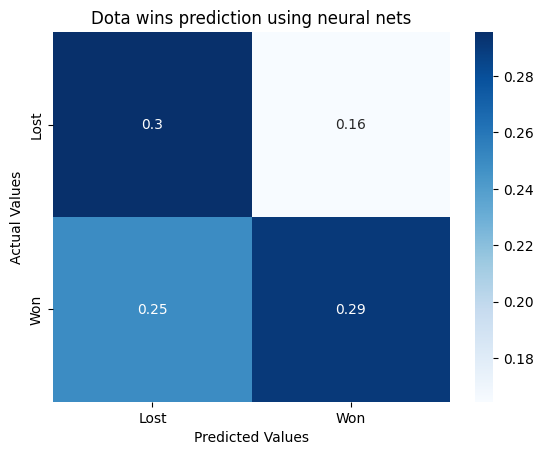

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confmatrix/confmatrix.sum(), annot=True, cmap='Blues')

ax.set_title('Dota wins prediction using neural nets')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Labels per value
ax.xaxis.set_ticklabels(['Lost','Won'])
ax.yaxis.set_ticklabels(['Lost','Won'])

plt.show()